## Black Friday Sales

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Create a dataframe

In [2]:
df = pd.read_csv(r"D:\Data Analytics\Projects\Black Friday Sales\train.csv")

# Task 1: Data Exploration and Cleaning

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# Check if there is any null value in the data
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# Mode of Product_Category_2
mode_pd2 = df["Product_Category_2"].mode()[0]  # Extracting the mode value

# Fill the null values in "Product_Category_2" with the mode value of "Product_Category_2"
df["Product_Category_2"].fillna(mode_pd2, inplace=True)

In [8]:
# Mode of Product_Category_3
mode_pd3 = df["Product_Category_3"].mode()[0]

# Fill the null values in "Product_Category_3" with the mode value of "Product_Category_3"
df["Product_Category_3"].fillna(mode_pd3 ,inplace=True)

In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

# Task 2:Data Analysis & Data Visualization

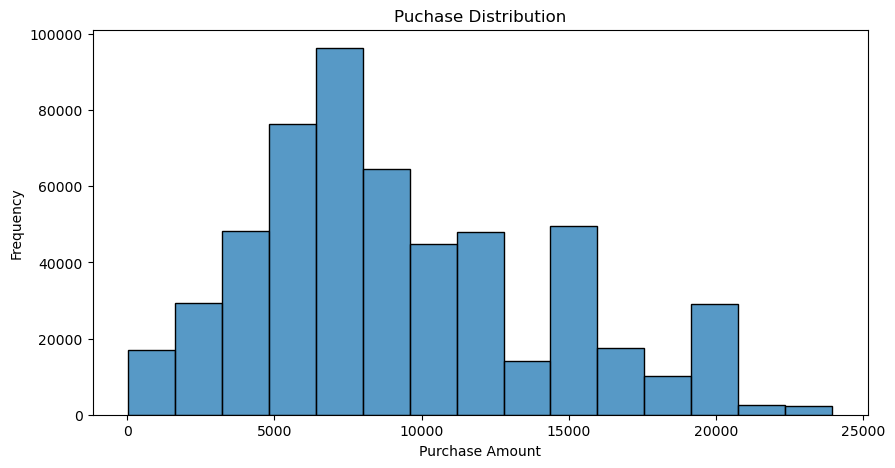

In [11]:
# Visualize purchase distribution with histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Purchase"], bins=15)
plt.title("Puchase Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

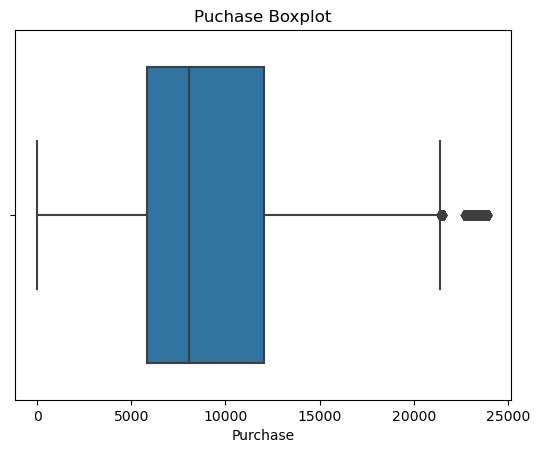

In [12]:
# Visualize purchase distribution with boxplot
sns.boxplot(x=df["Purchase"])
plt.title("Puchase Boxplot")
plt.show()

#### Outlier Analysis Using Z-Score

In [13]:
# Create a z-score column to find outliers
df["z-score"] = stats.zscore(df["Purchase"])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,z-score
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370,-0.177973
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1.181756
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422,-1.561193
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057,-1.633858
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969,-0.257805


In [14]:
# Filters the dataframe with the outliers
df_outliers = df[(df["z-score"] > 3) | (df["z-score"] < -3)]
df_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,z-score


After performing outlier analysis using the z-score method on the "Purchase" column, it was determined that no outliers were identified.

#### Top 10 Customers by Spending

In [15]:
# Group the DataFrame by "User_ID" and calculate number of transactions and total amount spent
user_transactions = df.groupby("User_ID").agg(
    num_transactions=("User_ID", "count"),   # Count the number of transactions for each user
    total_spent=("Purchase", "sum")           # Calculate the total amount spent by each user
).reset_index()

# Sort the user_transactions DataFrame by "total_spent" in descending order and show the top 10 users
top_users_by_spending = user_transactions.sort_values("total_spent", ascending=False).head(10)

# Display the DataFrame with the top 10 users by spending
top_users_by_spending

,User_ID,num_transactions,total_spent
4166,1004277,979,10536909
1634,1001680,1026,8699596
2831,1002909,718,7577756
1885,1001941,898,6817493
416,1000424,694,6573609
4335,1004448,575,6566245
5683,1005831,727,6512433
981,1001015,740,6511314
3297,1003391,698,6477160
1142,1001181,862,6387961


#### Top 10 Selling Products

In [16]:
df["Product_ID"].value_counts().head(10)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Product_ID, dtype: int64

#### Purchase by gender

In [17]:
print("Gender Purchase Sum")
print(df.groupby(["Gender"])["Purchase"].sum())

print("Gender Purchase Mean")
print(df.groupby(["Gender"])["Purchase"].mean())

Gender Purchase Sum
Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64
Gender Purchase Mean
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


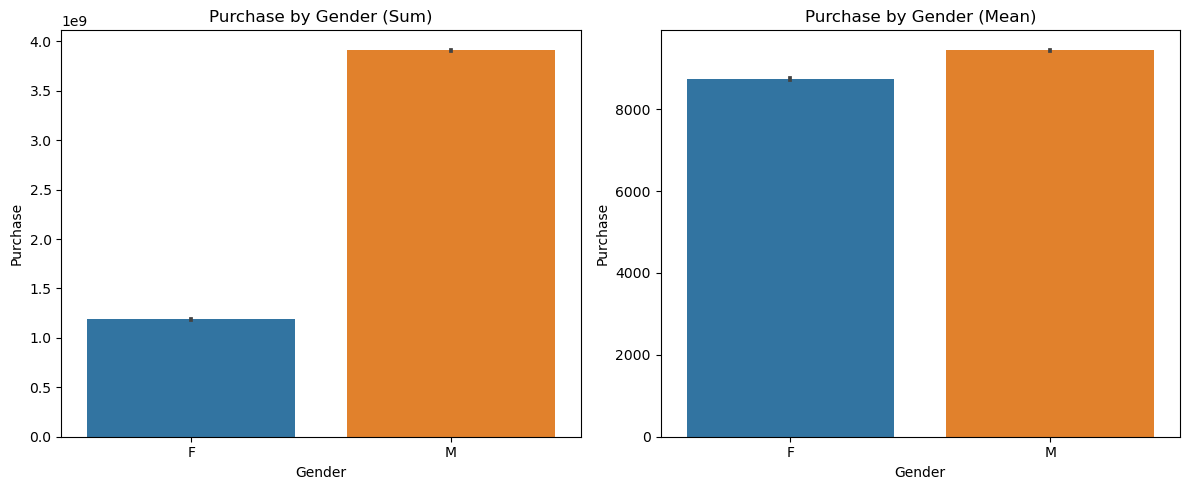

In [18]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Analyze purchase by gender (sum)
sns.barplot(data=df, x="Gender", y="Purchase", estimator="sum", ax=axes[0])
axes[0].set_title("Purchase by Gender (Sum)")

# Analyze purchase by gender (mean)
sns.barplot(data=df, x="Gender", y="Purchase", estimator="mean", ax=axes[1])
axes[1].set_title("Purchase by Gender (Mean)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Note

The analysis of purchase amounts by gender reveals interesting patterns:

- **Total Purchase Amount (Sum):** Males (M) exhibit significantly higher total purchase amounts, contributing approximately $3.9$ billion compared to females $1.2$ billion. This substantial difference suggests that males collectively engage in higher purchasing activities.

- **Average Purchase Amount (Mean):** While both genders display a propensity for purchasing, males' average purchase amount is approximately $700 higher than that of females. This suggests that, on average, males tend to spend more per transaction compared to females.

#### Purchase by age

In [19]:
# Analyze purchase by age
print("Age Purchase Sum")
print(df.groupby(["Age"])["Purchase"].sum())

print("Age Purchase Mean")
print(df.groupby(["Age"])["Purchase"].mean())

Age Purchase Sum
Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64
Age Purchase Mean
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


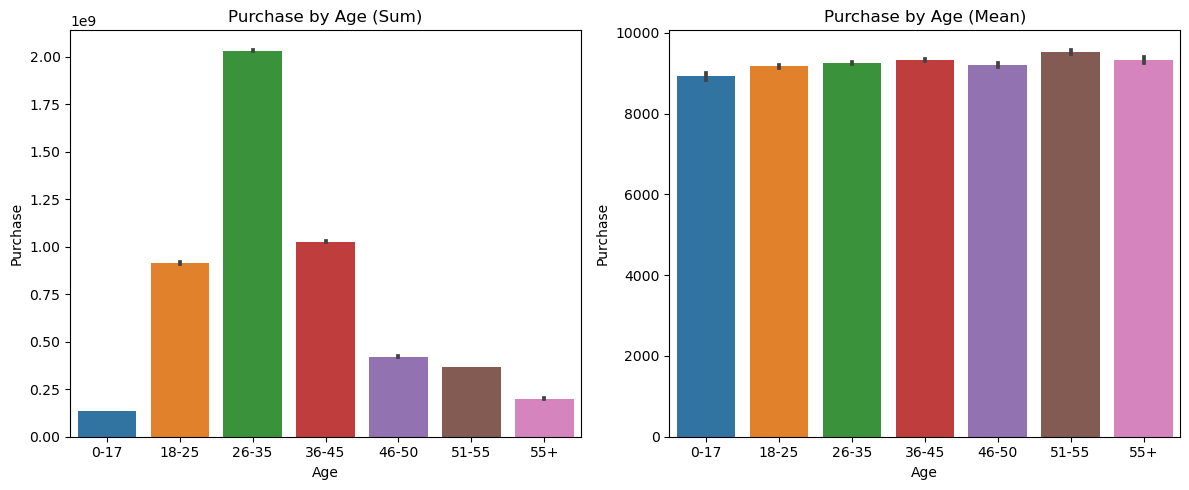

In [20]:
# Create age_order
age_order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Analyze purchase by Age (sum)
sns.barplot(data=df, x="Age", y="Purchase", estimator="sum", order=age_order, ax=axes[0])
axes[0].set_title("Purchase by Age (Sum)")

# Analyze purchase by Age (mean)
sns.barplot(data=df, x="Age", y="Purchase", estimator="mean", order=age_order, ax=axes[1])
axes[1].set_title("Purchase by Age (Mean)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Note

Spending behavior across different age segments:

- **Total Purchase Amount (Sum):** The age group **"26-35"** emerges as **the highest contributor to total purchase amount**, with a sum of approximately 2.03 billion. Following closely, the "18-25" and "36-45" age groups also make significant contributions to total purchase volume, with around 914 million and 1.03 billion, respectively.

- **Average Purchase Amount (Mean):** The "51-55" age group exhibits the highest average purchase amount, with an average of approximately 9535. On the other hand, the "0-17" and "18-25" age groups display lower average purchase amounts, around 8933 and 9170, respectively.

These insights highlight that individuals in the **"26-35" age are the most active purchasers** in terms of both total volume and average transaction amount. These observations provide valuable guidance for targeted marketing strategies catering to different age groups.

#### Purchase by occupation

In [21]:
# Analyze purchase by occupation
print("Occupation Purchase Sum")
print(df.groupby(["Occupation"])["Purchase"].sum())

print("Occupation Purchase Mean")
print(df.groupby(["Occupation"])["Purchase"].mean())

Occupation Purchase Sum
Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64
Occupation Purchase Mean
Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64


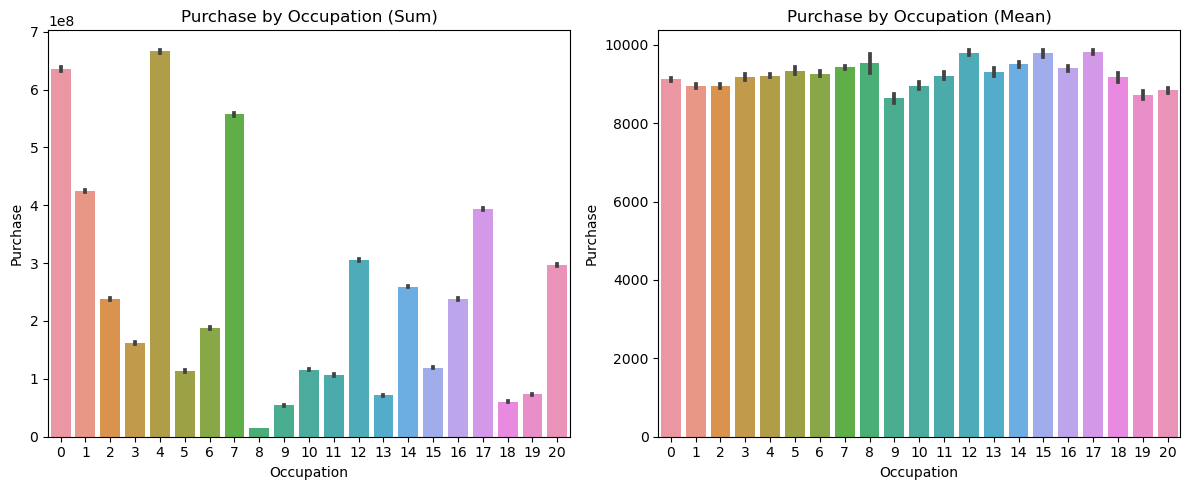

In [22]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Analyze purchase by Occupation (sum)
sns.barplot(data=df, x="Occupation", y="Purchase", estimator="sum", ax=axes[0])
axes[0].set_title("Purchase by Occupation (Sum)")

# Analyze purchase by Occupation (mean)
sns.barplot(data=df, x="Occupation", y="Purchase", estimator="mean", ax=axes[1])
axes[1].set_title("Purchase by Occupation (Mean)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Note:
Analyzing purchase amounts by occupation reveals interesting patterns and variations in spending behavior across different occupations:

- **Total Purchase Amount (Sum):** The occupation with the highest total purchase amount is **Occupation 4**, contributing approximately **666 million**, followed by Occupation 0 with around 635 million and Occupation 7 with about 557 million.

- **Average Purchase Amount (Mean):** While most occupations exhibit similar average purchase amounts, there are variations. Occupation 12 stands out with the highest average purchase amount of approximately $9797.

These insights suggest that specific occupations, such as **Occupation 0 and 4, make significant contributions to the overall purchase volume**. Additionally, variations in average purchase amounts across occupations, such as Occupation 12, highlight differences in spending habits based on occupation.

#### Purchase by city

In [23]:
# Calculate the count of each city category
city_counts = df["City_Category"].value_counts()
city_counts

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

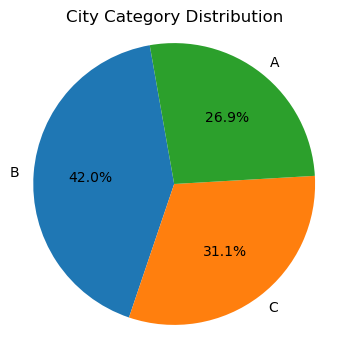

In [24]:
# Create a pie chart to visualize the distribution of city categories
plt.figure(figsize=(4, 4))
plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=100)
plt.title("City Category Distribution")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Note:

- **City Category B:** The city category with the highest count is Category B, accounting for approximately 231,173 customers. This suggests a relatively higher concentration of customers in this category.

- **City Category C:** Following closely, City Category C has a count of about 171,175 customers. This also indicates a significant customer presence in this category.

- **City Category A:** City Category A shows a count of around 147,720 customers, making it the category with the lowest count among the three. Nevertheless, it still represents a considerable number of customers.

#### Purchase by Stay In Currect City

In [25]:
# Calculate the sum of purchase amounts for each "Stay_In_Current_City_Years" category
purchase_by_years = df.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().reset_index()
purchase_by_years

,Stay_In_Current_City_Years,Purchase
0,0,682979229
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390


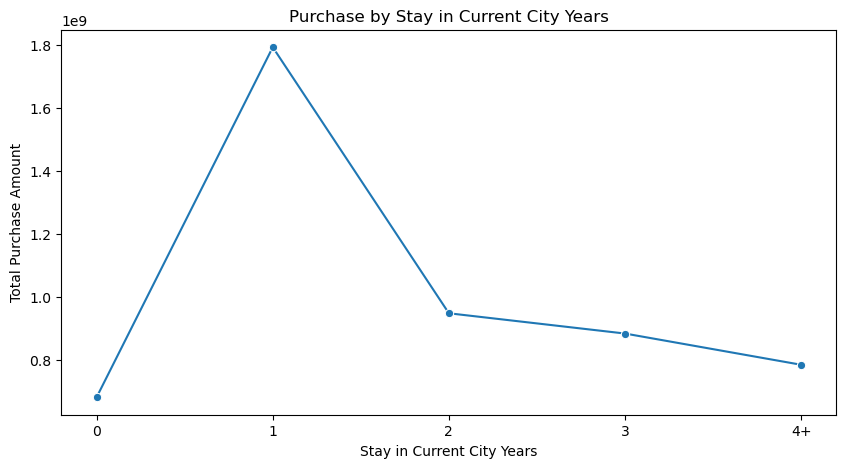

In [26]:
# Create a line chart to visualize purchase amounts by "Stay_In_Current_City_Years"
plt.figure(figsize=(10, 5))
sns.lineplot(data=purchase_by_years, x="Stay_In_Current_City_Years", y="Purchase", marker="o")
plt.title("Purchase by Stay in Current City Years")
plt.xlabel("Stay in Current City Years")
plt.ylabel("Total Purchase Amount")
plt.show()

#### Note:
Customers with a stay of **1 year** in the current city exhibit the highest total purchase amount among all categories, contributing around $1.79 billion. This could imply that the second year of residence is marked by increased shopping and spending habits.

#### Purchase by Marital Status

In [27]:
# Calculate the count of marital category
marital_counts = df["Marital_Status"].value_counts()
marital_counts

0    324731
1    225337
Name: Marital_Status, dtype: int64

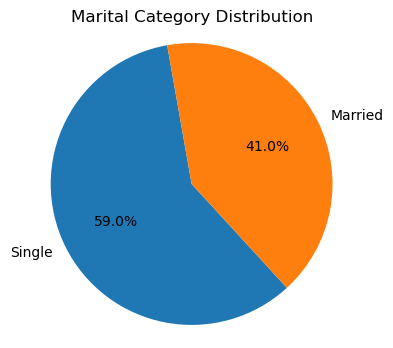

In [28]:
# Define marital category labels
marital_labels = {1: "Married", 0: "Single"}

# Create a pie chart with labeled wedges
plt.figure(figsize=(4, 4))
plt.pie(marital_counts, labels=[marital_labels[val] for val in marital_counts.index], autopct="%1.1f%%", startangle=100)
plt.title("Marital Category Distribution")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Note:

Examining the purchase amounts based on marital status yields valuable insights into the spending behavior of customers:

- **Single (Marital Status: 0):** Customers with a single marital status contribute a total purchase amount of approximately $325 million. This indicates that individuals who are not married are actively participating in retail transactions and have a notable impact on the overall purchase volume.

- **Married (Marital Status: 1):** Married customers collectively account for a significant purchase amount of around $225 million. This demonstrates that individuals in marital relationships also engage in substantial shopping activities, contributing substantially to the retail economy.

# Task 3: Conclusion

## Recommendations

1. **Gender-Specific Marketing:** Customize marketing campaigns for males and females based on their purchasing behavior. Use personalized recommendations, promotions, and messaging for each gender.

2. **Target Younger and Older Age Groups:** While customers aged 26-35 contribute significantly to purchase amounts, do not overlook the potential of the 18-25 age group. Consider designing offers that appeal to both these segments, capturing the spending power of both younger and older customers.

3. **Focus on City Category B:** Concentrate efforts on City Category B due to its highest purchase volume. Understand their preferences and craft targeted campaigns.

4. **Engage Customers in Their First Year:** Engage customers in their first year to encourage loyalty and repeat purchases.

5. **Cater to Single Customers:** Single customers contribute significantly to the purchase amount. Create offerings that cater to the preferences of single individuals, ensuring their needs are addressed in marketing campaigns.

6. **Optimize Strategies for Occupation 4:** Customers in Occupation 4 demonstrate the highest purchase amounts. Tailor marketing strategies and product offerings to align with the preferences and behaviors of this specific occupation group.

7. **Nurture High-Engagement Customers:** Develop loyalty programs and exclusive offers to retain high-engagement customers identified by transaction count and total spending.

Leveraging these findings can lead to **targeted marketing campaigns, enhanced customer experiences, and improved revenue generation** for "ABC Private Limited." Data-driven decisions can foster customer loyalty and drive growth.